##**Data Analysis and Classification Report for Exoplanet Detection**

In this report, we will analyze a Kepler exoplanet dataset and perform classification using various machine learning algorithms. The dataset used for analysis is "cumulative.csv". Let's go through the different steps of the analysis.

---

### Data Loading

We start by importing the necessary modules and read the dataset using the pandas library.

We then get information out of the dataset





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df = pd.read_csv("cumulative.csv")

In [4]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
df['koi_kepmag'].describe()

count    9563.000000
mean       14.264606
std         1.385448
min         6.966000
25%        13.440000
50%        14.520000
75%        15.322000
max        20.003000
Name: koi_kepmag, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [7]:
df['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

### Data Preprocessing

In this step, we preprocess the dataset by converting the target variable 'koi_disposition' into numerical values for classification purposes. We also plot

In [8]:
df['koi_disposition'] = df['koi_disposition'].replace('FALSE POSITIVE', '0')
df['koi_disposition'] = df['koi_disposition'].replace('CONFIRMED', '1')
df['koi_disposition'] = df['koi_disposition'].replace('CANDIDATE', '2')
df['koi_disposition'] = df['koi_disposition'].astype(int)

###Histogram Analysis

To gain insights into the distribution of the numerical variables in the dataset, we create histograms for all the columns.This code generates a set of histograms, with each column represented as a separate histogram. The figsize parameter determines the size of the figure, while color and edgecolor control the colors of the bars and the edges, respectively. By examining the histograms, we can understand the distribution and range of values for each variable.

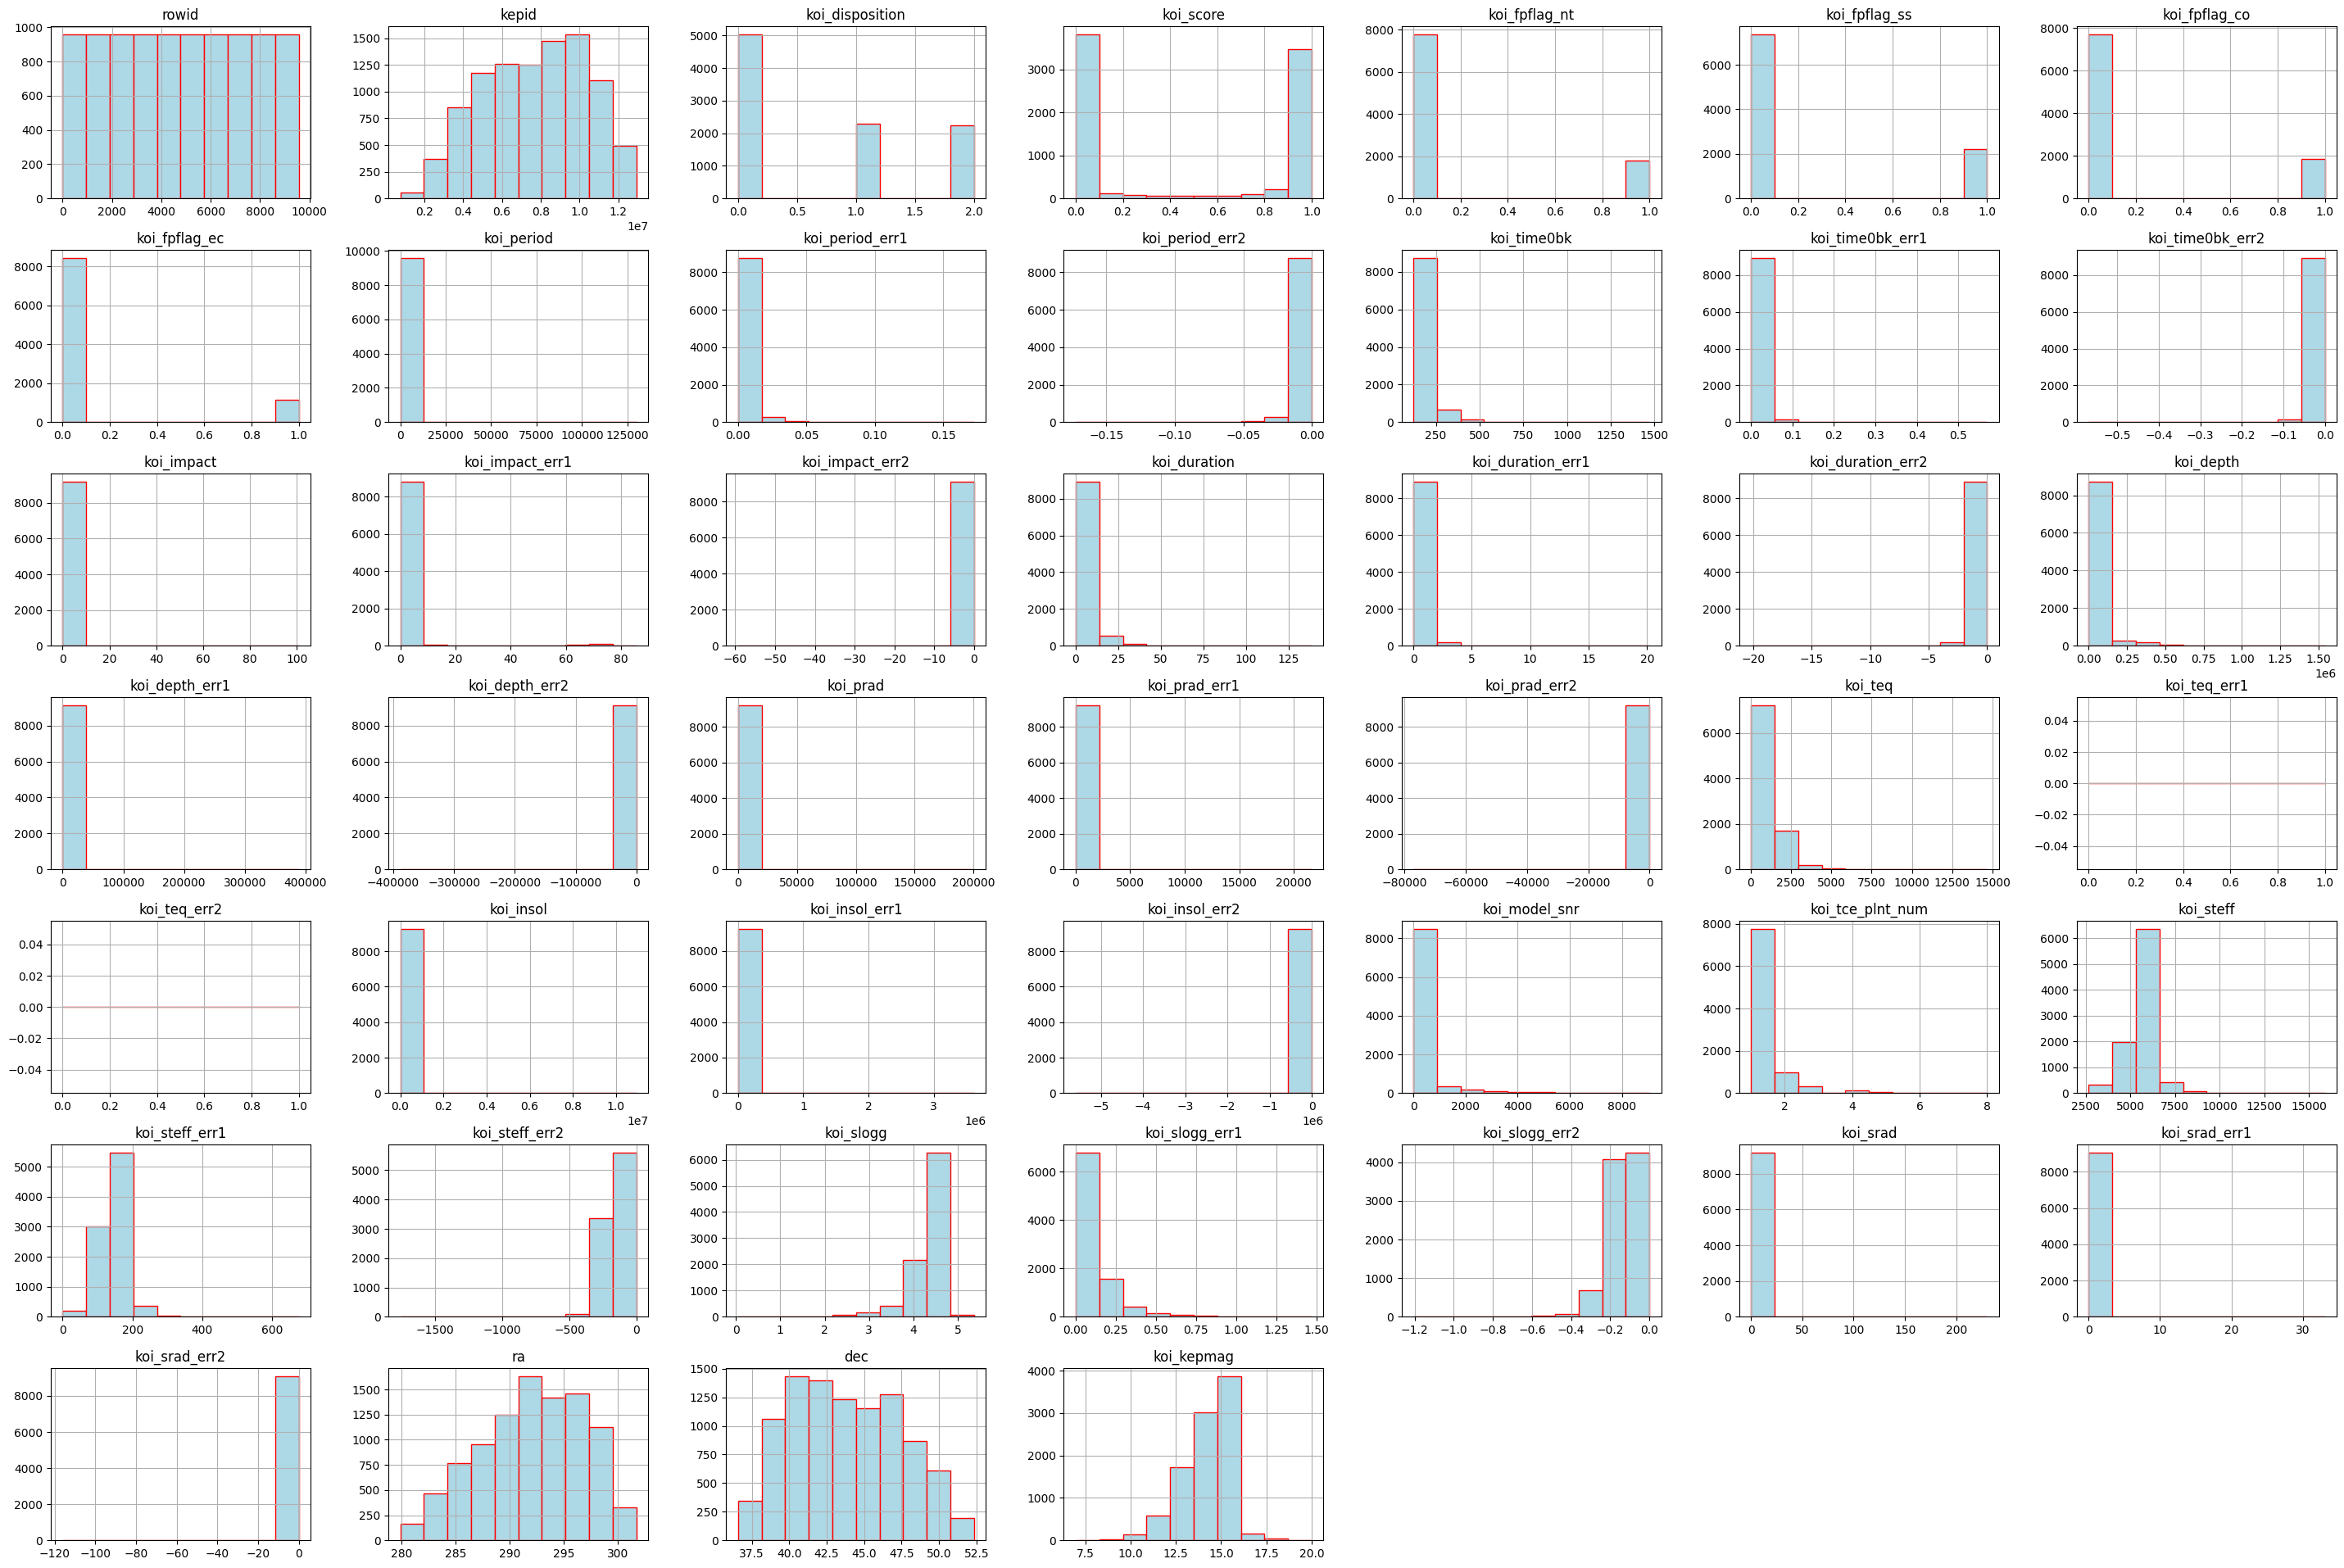

In [9]:
df.hist(figsize=(36, 24), color='lightblue', edgecolor='red')
plt.show()

###Correlation Matrix and Heatmap

To explore the relationships between different variables in the dataset, we create a correlation matrix and visualize it using a heatmap.The correlation matrix measures the pairwise correlations between all the variables in the dataset. The heatmap provides a visual representation of the correlation matrix, with colors indicating the strength and direction of the correlations. The annot=True parameter enables the display of correlation values within the heatmap.

In [10]:
plt.figure(figsize=(100,200))
cor = df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

<ipython-input-10-5357ec1f6831>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


###Feature Selection and Dataset Update

In this step, we perform feature selection by removing certain columns from the dataset. The following columns will be removed.We drop these columns from the dataset using the drop() function.After removing the specified columns, we obtain an updated dataset. To check the resulting dataset's information and column details, we use the info() function.Performing feature selection is useful for eliminating unnecessary or redundant features, focusing on the most relevant variables, and improving the efficiency and effectiveness of the subsequent analysis.

In [11]:
rem = ['rowid', 'kepler_name', 'koi_score', 'koi_impact_err1', 'koi_impact_err2', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_slogg', 'koi_steff_err1', 'koi_steff_err2', 'koi_impact', 'koi_model_snr','kepid',
        'kepoi_name', 'koi_pdisposition']

In [12]:
df = df.drop(rem, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9564 non-null   int64  
 1   koi_fpflag_nt    9564 non-null   int64  
 2   koi_fpflag_ss    9564 non-null   int64  
 3   koi_fpflag_co    9564 non-null   int64  
 4   koi_fpflag_ec    9564 non-null   int64  
 5   koi_time0bk      9564 non-null   float64
 6   koi_duration     9564 non-null   float64
 7   koi_depth        9201 non-null   float64
 8   koi_teq          9201 non-null   float64
 9   koi_steff        9201 non-null   float64
 10  ra               9564 non-null   float64
 11  dec              9564 non-null   float64
 12  koi_kepmag       9563 non-null   float64
dtypes: float64(8), int64(5)
memory usage: 971.5 KB


In [14]:
df.isna().sum()

koi_disposition      0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_time0bk          0
koi_duration         0
koi_depth          363
koi_teq            363
koi_steff          363
ra                   0
dec                  0
koi_kepmag           1
dtype: int64

###Missing Value Handling

In this step, we address missing values in the dataset by filling them with appropriate values. The following columns will be handled.By performing the below operations, we handle missing values in the respective columns by either filling them with a specific value or using the mean value of the column. This ensures that the dataset is complete and ready for further analysis.

In [15]:
df['koi_depth'].fillna(0, inplace=True)
df['koi_teq'].fillna(df['koi_depth'].mean(), inplace=True)
df['koi_steff'].fillna(df['koi_steff'].mean(), inplace=True)
df['koi_kepmag'].fillna(df['koi_kepmag'].mean(), inplace=True)

In [16]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_time0bk,koi_duration,koi_depth,koi_teq,koi_steff,ra,dec,koi_kepmag
0,1,0,0,0,0,170.538750,2.95750,615.8,793.0,5455.0,291.93423,48.141651,15.347
1,1,0,0,0,0,162.513840,4.50700,874.8,443.0,5455.0,291.93423,48.141651,15.347
2,0,0,1,0,0,175.850252,1.78220,10829.0,638.0,5853.0,297.00482,48.134129,15.436
3,0,0,1,0,0,170.307565,2.40641,8079.2,1395.0,5805.0,285.53461,48.285210,15.597
4,1,0,0,0,0,171.595550,1.65450,603.3,1406.0,6031.0,288.75488,48.226200,15.509


In [17]:
df['koi_disposition'].value_counts()

0    5023
1    2293
2    2248
Name: koi_disposition, dtype: int64

###Model Selection and Evaluation

In this step, we import various classification algorithms and evaluation metrics for model selection and evaluation. The imported libraries and modules are as follows.



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import lightgbm

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [19]:
#define X and y
y=df['koi_disposition']
X=df.drop(['koi_disposition'], axis=1)

In [29]:
#define X-train, X-test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
regressors = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),
              ExtraTreeClassifier(),HistGradientBoostingClassifier(),XGBRFClassifier(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),AdaBoostClassifier(),XGBClassifier(),lightgbm.LGBMClassifier()]
names = ['Logistic_Regression', 'DecisionTree', 'Random_Forest','Gaussian NB','ExtraTree', 'HistGradientBoosting','XGboostRF','catboost','adaboost','xgboost','LiGHtgbm']

* In this step, we define a list of classification algorithms and their corresponding names for model selection and initialization. The list of classifiers and their names is as follows:

* The regressors list contains instances of various classification algorithms, such as Logistic Regression, Decision Tree, Random Forest, Gaussian Naive Bayes, Extra Tree, HistGradient Boosting, XGBoost with Random Forest, AdaBoost, XGBoost, and LightGBM.

* The names list contains the corresponding names of the classifiers, making it easier to refer to them during the analysis and reporting process.





###Feature Scaling using StandardScaler

StandardScaler is used to perform feature scaling on the training and testing data.The process of feature scaling involves transforming the numerical features in a dataset to have a similar scale or distribution. This is done to ensure that no single feature dominates the learning process or introduces biases due to its larger magnitude.

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(X_train, y_train)
    
    # accuracy
    score = reg.score(X_test, y_test)
    model_dict[name] = [accuracy_score(y_train, reg.predict(X_train)),accuracy_score(y_test, reg.predict(X_test)) ]

In [28]:
model_df = pd.DataFrame(model_dict, index = ["Training Accuracy","Testing Accuracy"]).T
model_df= model_df.sort_values(by=["Training Accuracy","Testing Accuracy"], ascending=False)
model_df


,Training Accuracy,Testing Accuracy
Random_Forest,1.000000,0.867419
DecisionTree,1.000000,0.808448
ExtraTree,1.000000,0.786282
HistGradientBoosting,0.995260,0.872438
adaboost,0.995121,0.874948
xgboost,0.984665,0.871602
XGboostRF,0.943259,0.861564
catboost,0.784330,0.779590
Logistic_Regression,0.783912,0.795065
Gaussian NB,0.718528,0.711418


The table presents the training accuracy and testing accuracy scores of various classifiers. Here are some inferences we can draw from the table:

* Random Forest: Random Forest achieves a  testing accuracy of 0.867419 suggests that it performs well on unseen data.


* Decision Tree: Similar to Random Forest, the Decision Tree classifier achieves the testing accuracy of 0.808448 is slightly lower, indicating some overfitting and a drop in performance on unseen data compared to the training data.

In [30]:
rmf=RandomForestClassifier()

# Train Model
rmf.fit(X_train,y_train)

# Training set performance
train_accuracy= rmf.score(X_train,y_train)

#Testing set performance
test_accuracy=rmf.score(X_test,y_test)
y_pred=rmf.predict(X_test)

print('----------------------------------')
print('Accuracy for Testing set is')
print( 100*test_accuracy)
print('----------------------------------')
print('\n The Classification Report is as below\n')
print(classification_report(y_test,y_pred))

----------------------------------
Accuracy for Testing set is
86.90924299456294
----------------------------------

 The Classification Report is as below

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1250
           1       0.76      0.75      0.76       574
           2       0.74      0.74      0.74       567

    accuracy                           0.87      2391
   macro avg       0.83      0.83      0.83      2391
weighted avg       0.87      0.87      0.87      2391



The classification report provides additional performance metrics for the overall classification task. Here are some inferences we can draw from the table:

* Precision: Precision represents the ability of the classifier to correctly predict the positive class. The precision for class 0 is very high at 0.98, indicating that the classifier performs well in identifying true negatives. The precision for class 1 is 0.76, suggesting that it correctly predicts around 76% of the confirmed exoplanets (true positives). The precision for class 2 is also 0.74, indicating a similar level of performance in predicting candidates.

* Recall: Recall measures the ability of the classifier to identify all positive class instances correctly. The recall for class 0 is 0.98, indicating that it captures a high proportion of true positives for the confirmed negatives. The recall for class 1 is 0.75, suggesting that it correctly identifies 75% of the confirmed exoplanets. The recall for class 2 is also 0.74, indicating a similar level of performance in capturing candidates.

* F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics.
